## Импорт необходимых библиотек. 

In [7]:
import pandas as pd
import os

#### Сгруппируем продажи по каждому из месяцев в один CSV-файл. 

In [45]:
files = [file for file in os.listdir('./Sales_Data')]

all_month = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_month = pd.concat([all_month, df])
    
all_month.to_csv('all_data.csv', index=False)

In [46]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Очистим данные. 

### Уберем пустые значения

In [48]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Отфильтруем значения с некорректной датой покупки. 

In [49]:
tmp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
tmp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [50]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Добавим в таблицу колонку с месяцем каждой покупки. 

In [51]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Добавим колонку суммы покупок по каждому заказу. 

In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [54]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Данные отфильтрованы и обработаны. 

#### Проанализируем по таблице в какой месяц было продано больше всего товаров, и какая именно была сумма заработка? 

In [57]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [59]:
all_data.groupby('Month')['Sales'].sum().max()

4613443.34

Как мы можем заметить, самым прибыльным месяцем оказался декабрь.

Для наглядности, построим гистограмму "Сумма - Месяц". 

Text(0, 0.5, 'Sales in USD')

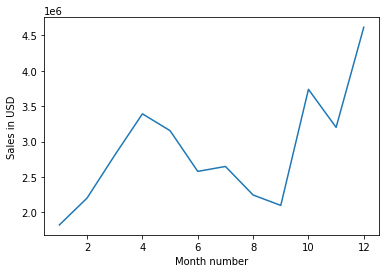

In [112]:
import matplotlib.pyplot as plt

result = all_data.groupby('Month')['Sales'].sum()

month = range(1, 13)

plt.plot(month, result)
plt.xlabel('Month number')
plt.ylabel('Sales in USD')

### Ответим на вопрос. В каком городе было совершено наибольшее число покупок?

#### Добавим колонку с названием города и штата. 

In [82]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


In [85]:
res = all_data.groupby('City', as_index=False).sum()
res

,City,Quantity Ordered,Price Each,Month,Sales
0,"Atlanta, GA",16602,2779908.20,104794,2795498.58
1,"Austin, TX",11153,1809873.61,69829,1819581.75
2,"Boston, MA",22528,3637409.77,141112,3661642.01
3,"Dallas, TX",16730,2752627.82,104620,2767975.40
4,"Los Angeles, CA",33289,5421435.23,208325,5452570.80
5,"New York City, NY",27932,4635370.83,175741,4664317.43
6,"Portland, ME",2750,447189.25,17144,449758.27
7,"Portland, OR",11303,1860558.22,70621,1870732.34
8,"San Francisco, CA",50239,8211461.74,315520,8262203.91
9,"Seattle, WA",16553,2733296.01,104941,2747755.48


Text(0, 0.5, 'Sales in USD')

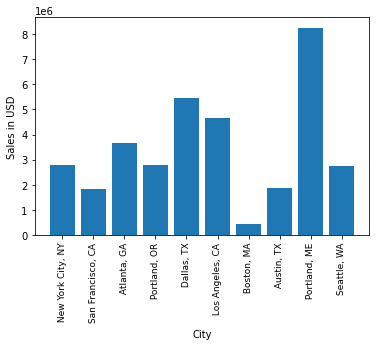

In [93]:
cities_un = all_data.City.unique()
cities_un

plt.bar(cities_un, res.Sales)
plt.xticks(cities_un, rotation='vertical', size=9)
plt.xlabel('City')
plt.ylabel('Sales in USD')

###  В какое время эффективнее показывать рекламу для увеличения объема покупаемого товара?

In [109]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [110]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


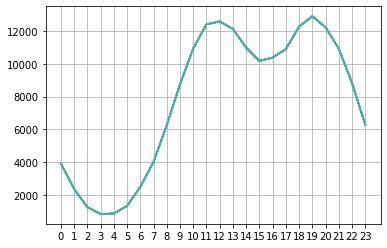

In [119]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

 Исходя из графика, можем сделать вывод, что наибольшее количество покупок совершается либо в обед (11 - 12 часов) либо после работы (19 - 20). 

Следовательно, наиболее эффектино показывать рекламу именно в эти моменты времени. 

## Какие продукты наиболее часто продаются вместе?

In [128]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,"New York City, NY",22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,"Portland, OR",15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,"Dallas, TX",9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,"Dallas, TX",23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,"Dallas, TX",11,51


Как можно увидеть, некоторые товары находятся в одном заказе. Это можно определить по Id заказа и месте получения заказа. 

In [139]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32


In [140]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(20)

/var/folders/2m/dh55t7t121l8zkdsb3r2vl7h0000gn/T/ipykernel_61701/2866592959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [150]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print (key, value)

###  Проанализиуем, какой токар продается больше всех? С чем это может быть связано?

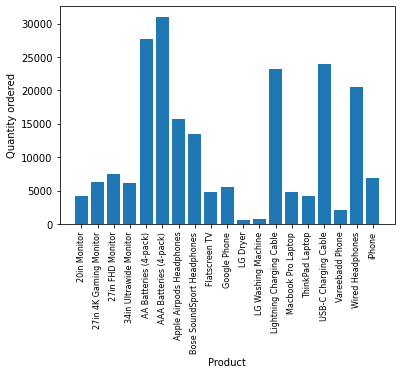

In [157]:
product_group = all_data.groupby('Product', as_index = False)
quality_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quality_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity ordered')

plt.show()

По данным ступенчатой диаграммы можно сделать вывод, что наиболее часто покупаются товары небольших размеров, которые, например можно легко потерять.

Наиболее редко же покупают товары длительного пользования. 

/var/folders/2m/dh55t7t121l8zkdsb3r2vl7h0000gn/T/ipykernel_61701/2886957326.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


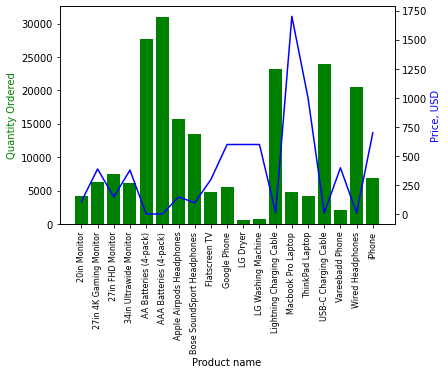

In [168]:
prices = all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quality_ordered, color='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price, USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

По данным уже совместной ступенчатой диаграммы и среднего значения стоимости каждого товара, можно также сделать вывод, что наиболее часто покупаются товары с невысокой средней ценой.

Наиболее редко же покупают товары со значением выше среднего по списку. 